In [56]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] =  (12,8)


In [57]:
# Reading the data

df = pd.read_csv(r'.\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [59]:
# Looking for missing Data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))



name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [60]:
# Checking Datatypes 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [61]:
# Changing datatypes of 'budget' and 'gross' Columns for visual purposes

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [62]:
# Ordering by gross column

df = df.sort_values(by=['gross'], inplace = False, ascending = False)


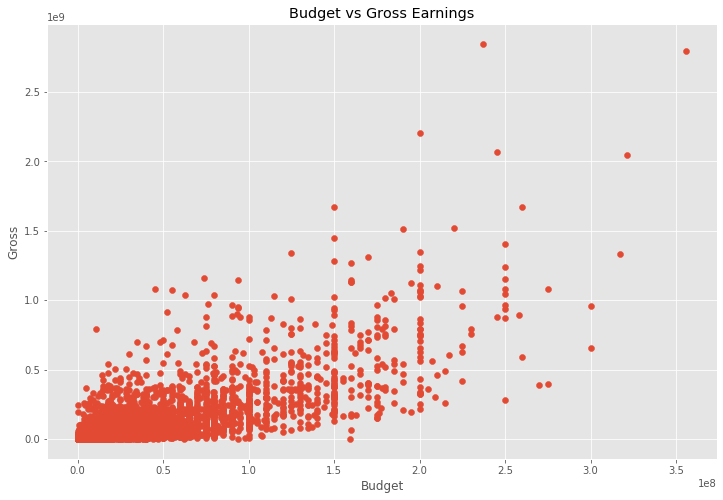

In [63]:
# Plotting a scatter plot with budget vs gross using matplotlib

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()



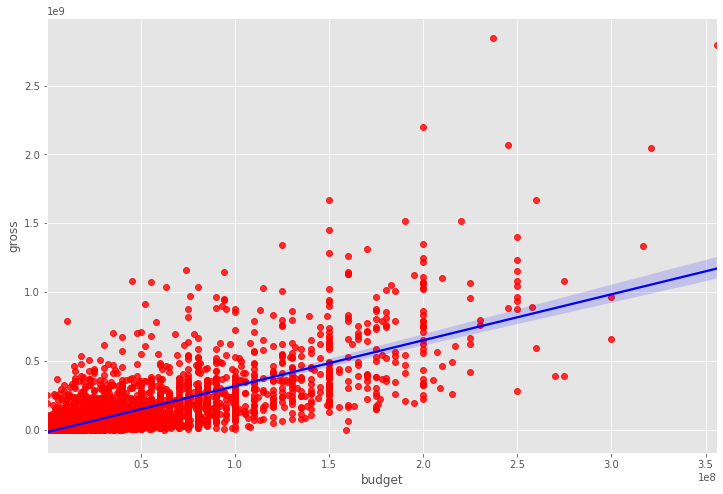

In [64]:
# Plotting a regresion plot of Budget vs Gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.show()

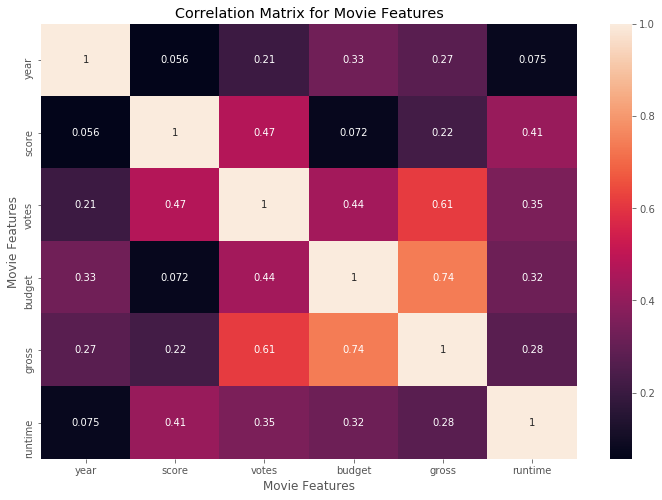

In [65]:
# Looking for correlation between Budget and Gross Earnings

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()



In [ ]:
# Budget and Votes have a high Corelation with Gross Earnings

In [69]:
# Creating a new dataframe where object datatypes are converted to numerized datatypes

df_numerized = df

for col_name in df_numerized:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
5302,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
1795,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
4730,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
5158,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149


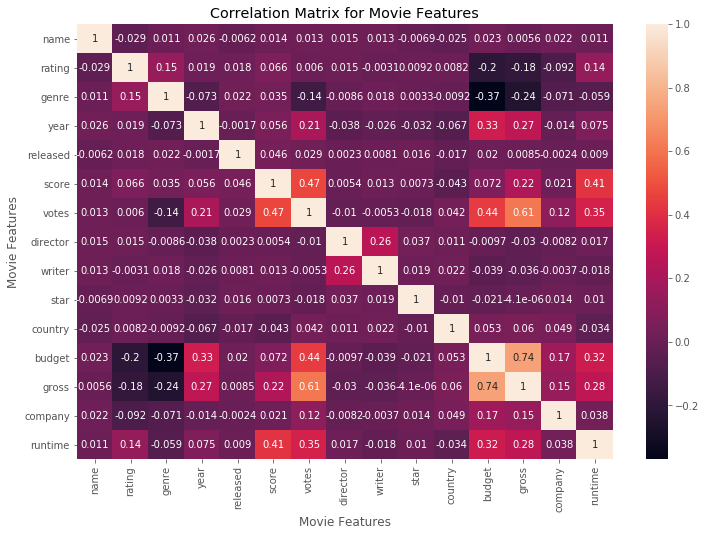

In [67]:
# Looking at correlation between Company and Gross Earnings

correlation_matrix2 = df_numerized.corr()

sns.heatmap(correlation_matrix2, annot = True)
plt.title('Correlation Matrix for Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [49]:
# Company has a low correlation with Gross Earnings

In [68]:
# Unstacking and sorting correlation pairs

correlation_pairs = correlation_matrix2.unstack()
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs[(sorted_pairs) > 0.5]

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Hence, Budget and Votes have high correlation with Gross Earnings
# Company has very low correlation